In [1]:
import time
import os
import random
import argparse
import datetime
import numpy as np
import pandas as pd
from pathlib import Path
from logzero import logger
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasheets
path = "/lustre/scratch/kiviaho/myoma/myoma-new/sheets/"
sample_sheet = pd.read_csv(path + "sample_sheet_three_batches.csv",sep=";")
patient_sheet = pd.read_csv('/lustre/scratch/kiviaho/myoma/myoma-new/sheets/patient_sheet_three_batches.csv',sep='\t')
patient_sheet['Patient'] = pd.Series(patient_sheet['Patient'], dtype="string")
patient_sheet.drop(['Tiles'], axis=1,inplace=True)


In [3]:
# Repeat this for as many batches as there are:
tiles_b1 = pd.read_csv(path + "batch-1-tiles.tsv",sep='\t',header=None)
tiles_b1 = tiles_b1.rename(columns={0:"Tile"})  

# Repeat this for as many batches as there are:
tiles_b2 = pd.read_csv(path + "batch-2-tiles.tsv",sep='\t',header=None)
tiles_b2 = tiles_b2.rename(columns={0:"Tile"})  

# Repeat this for as many batches as there are:
tiles_b3 = pd.read_csv(path + "batch-3-tiles.tsv",sep='\t',header=None)
tiles_b3 = tiles_b3.rename(columns={0:"Tile"})  


In [4]:
# Create a sample column in new samples tile sheet to merge by 
samples_b1 = list()
for tile in tiles_b1['Tile']:
    lst = tile.split('/')
    s = '_'.join(lst[len(lst)-1].split('_')[1:4])
    samples_b1.append(s)
    
tiles_b1['Sample'] = samples_b1

In [5]:
samples_b2 = list()
for tile in tiles_b2['Tile']:
    lst = tile.split('/')
    s = lst[len(lst)-1].split('_')[1]
    samples_b2.append(s)

tiles_b2['Sample'] = samples_b2

In [6]:
samples_b3 = list()
for tile in tiles_b3['Tile']:
    lst = tile.split('/')
    s = lst[len(lst)-1].split('_')[1]
    samples_b3.append(s)

tiles_b3['Sample'] = samples_b3

In [7]:
# Remove trailing characters to ensure smooth merging
sample_sheet['Sample'] = sample_sheet['Sample'].str.strip()

# Merge sheets
tile_sheet = tiles_b1.append(tiles_b2,ignore_index=True)
tile_sheet = tile_sheet.append(tiles_b3,ignore_index=True)

samples_with_tiles = pd.merge(sample_sheet,tile_sheet,on="Sample")



In [59]:
# Save the final csv file
#samples_with_tiles.to_csv('/lustre/scratch/kiviaho/myoma/myoma-new/sheets/sample_by_tile_three_batches.tsv',sep="\t",index=False)



In [51]:
## BELOW IS VISUALIZATIONS AND ANALYSIS ###

In [12]:
# RECIPE FOR MAKING THE CORRECT PATIENT LVL SAMPLE SHEET
# The original was made with excel, this overwrites it.
freq_df = samples_with_tiles[['Sample','Type','Patient']]
freq_df['Patient'] = pd.Series(freq_df['Patient'], dtype="string")
freq_df['Tiles'] = 1
patient_freq = freq_df.groupby('Patient',as_index=False).sum()

In [22]:
patient_sheet = pd.merge(patient_sheet,patient_freq,on="Patient")

In [25]:
#patient_sheet.to_csv('/lustre/scratch/kiviaho/myoma/myoma-new/sheets/patient_sheet_three_batches.csv',sep='\t')

In [61]:
freq_df = samples_with_tiles[['Sample','Type','Patient']]
freq_df['Patient'] = pd.Series(freq_df['Patient'], dtype="string")
freq_df['Tiles'] = 1

sample_freq = freq_df.groupby('Sample').sum()
muts_freq = freq_df.groupby('Type',as_index=False).sum()
patient_freq = freq_df.groupby('Patient').sum()



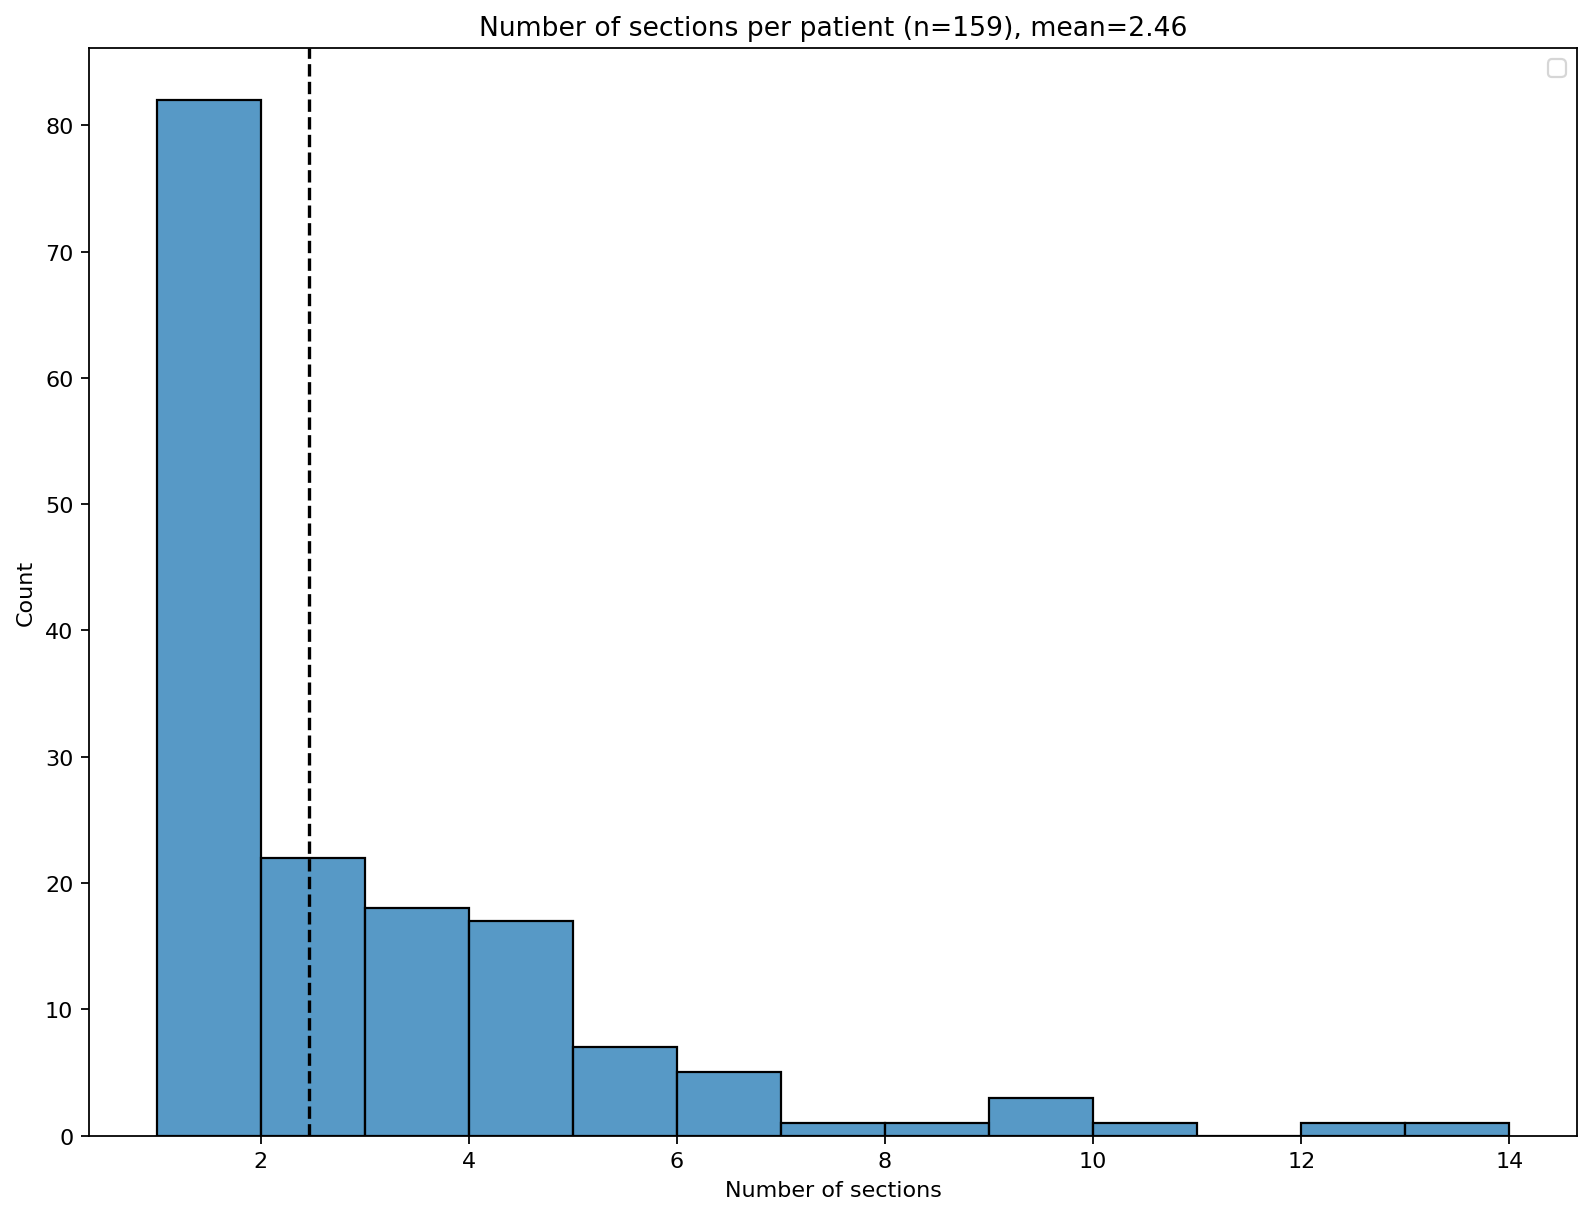

In [86]:
section_mean = np.round(np.mean(n_slices_per_patient),2)
plt.figure(figsize=(12, 9), dpi=160)
fig = sns.histplot(n_slices_per_patient,binwidth=1)
plt.xlabel("Number of sections")
plt.title('Number of sections per patient (n=159), mean='+str(section_mean))
plt.axvline(x=section_mean, color='k', linestyle='--')
plt.legend('')

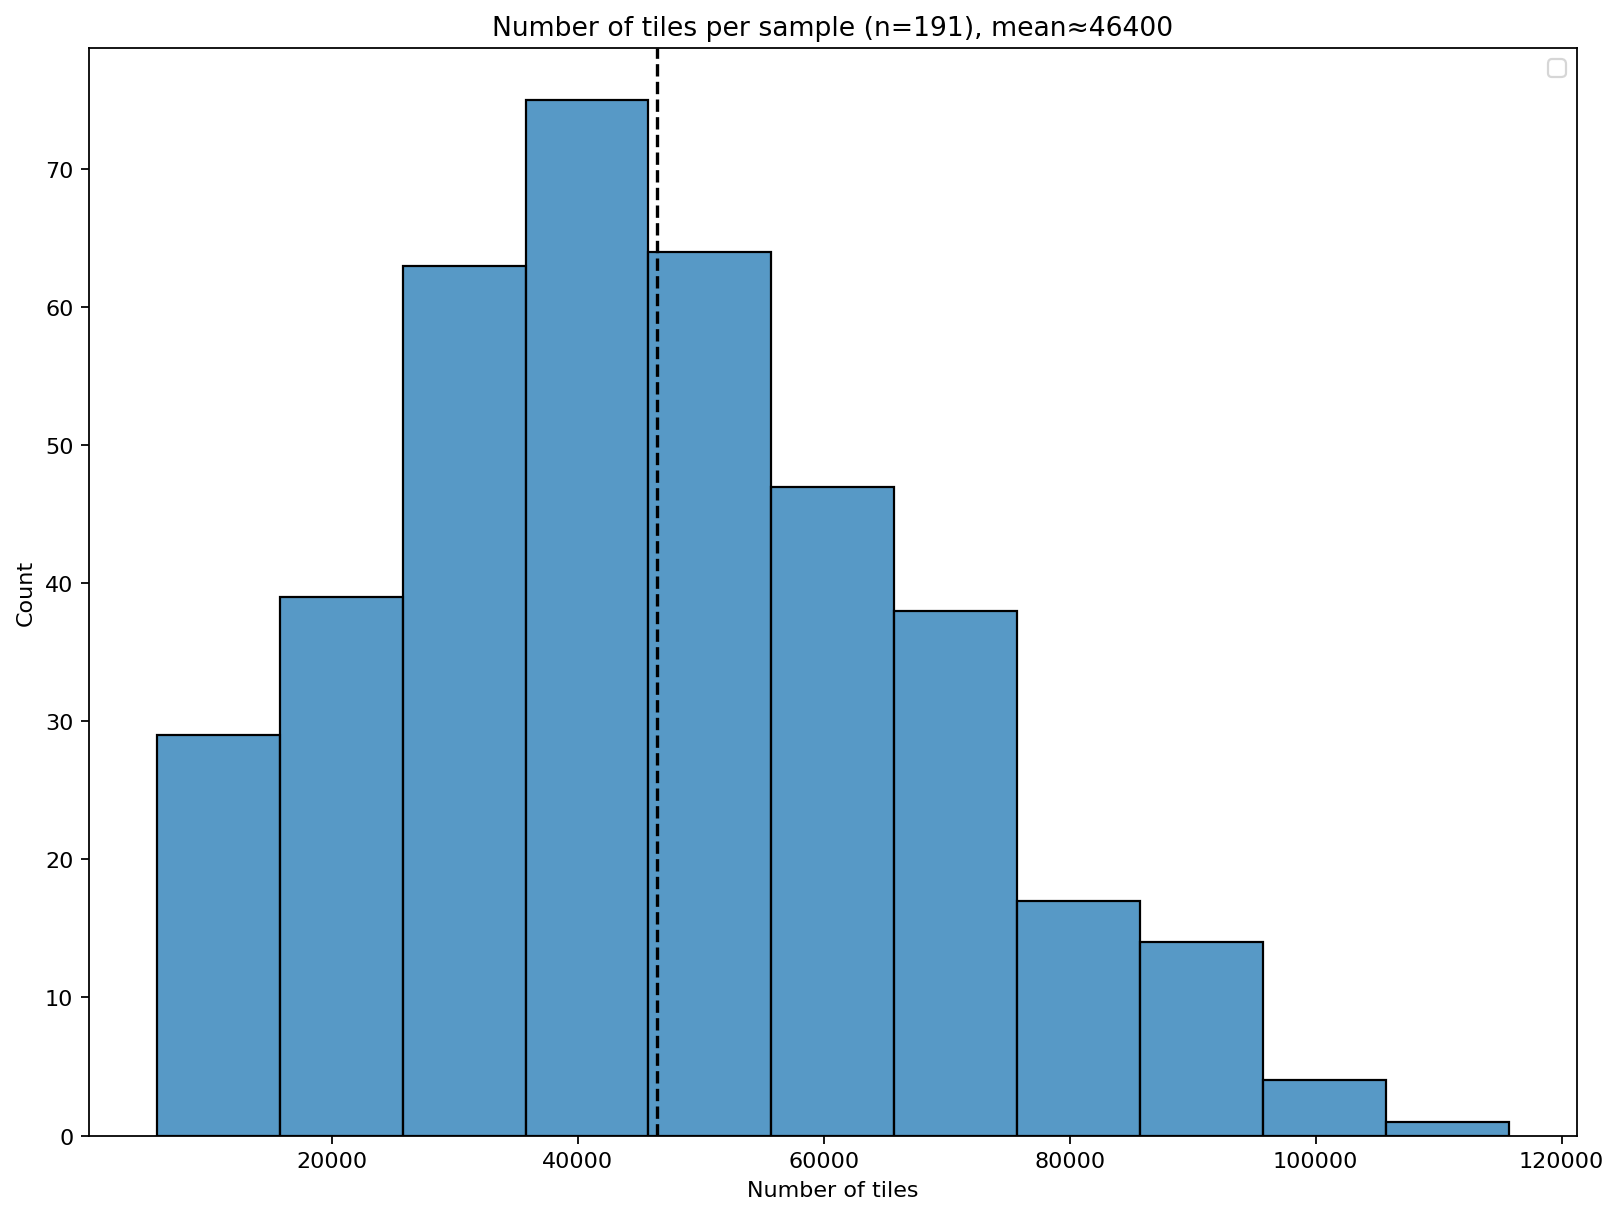

In [76]:
tile_mean = np.int(np.round(np.mean(sample_freq['n_samples']),-2))
plt.figure(figsize=(12, 9), dpi=160)
fig = sns.histplot(sample_freq['n_samples'],binwidth=10000)
plt.xlabel("Number of tiles")
plt.title('Number of tiles per sample (n=191), mean≈'+str(tile_mean))
plt.axvline(x=tile_mean, color='k', linestyle='--')
plt.legend('')
#plt.savefig('new_dataset_tiles_per_sample.png')

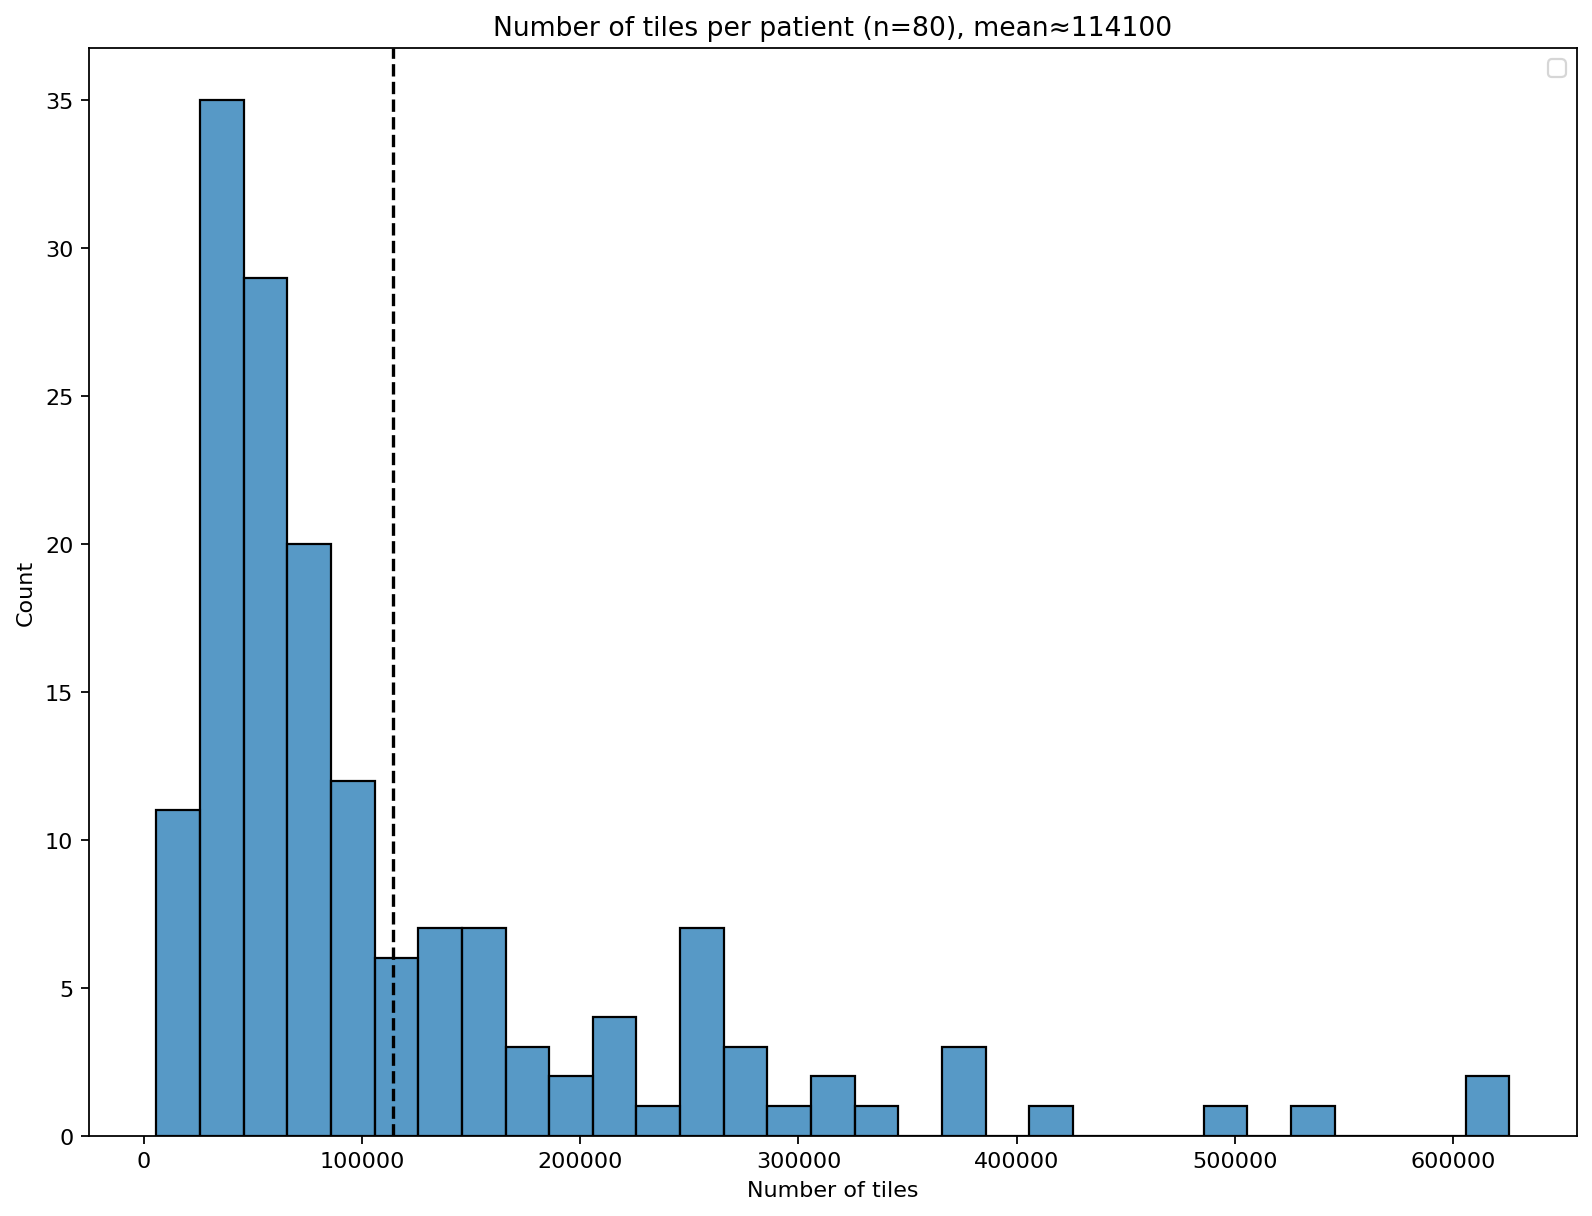

In [80]:
tile_mean = np.int(np.round(np.mean(patient_freq['n_samples']),-2))
plt.figure(figsize=(12, 9), dpi=160)
fig = sns.histplot(patient_freq['n_samples'],binwidth=20000)
plt.xlabel("Number of tiles")
plt.title('Number of tiles per patient (n=80), mean≈'+str(tile_mean))
plt.axvline(x=tile_mean, color='k', linestyle='--')
plt.legend('')
plt.savefig('new_dataset_tiles_per_patient.png')

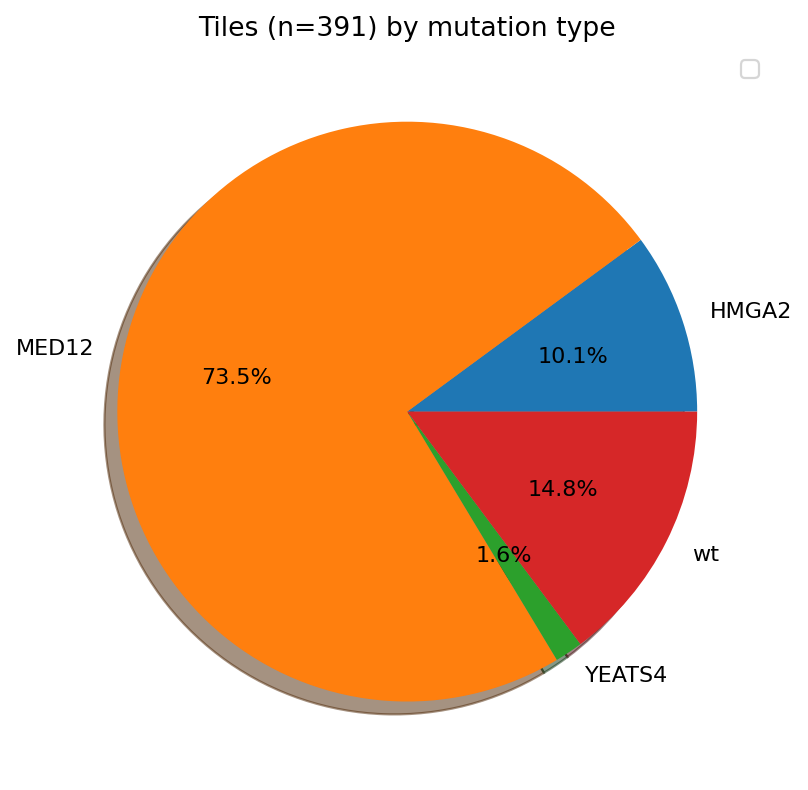

In [87]:
plt.figure(figsize=(6, 6), dpi=160)
plt.pie(muts_freq['n_samples'],labels= muts_freq['Type'],autopct='%1.1f%%',shadow=True)
plt.title('Tiles (n='+ str(len(sample_sheet)) +') by mutation type')
plt.legend('')
#plt.savefig('new_dataset_tiles_per_sample.png')